In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("/content/Input.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         105 non-null    object
 1   Mood        105 non-null    object
 2   Activity-1  105 non-null    object
 3   Activity-2  105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


In [4]:
df.describe()

,Day,Mood,Activity-1,Activity-2
count,105,105,105,105
unique,7,9,8,20
top,Monday,Neutral,Work,Daily Monotony
freq,15,33,30,16


In [5]:
df.head()

,Day,Mood,Activity-1,Activity-2
0,Monday,Sad,Work,Heavy Workload
1,Tuesday,Sad,Relationships,Argument
2,Wednesday,Lonely,Routine,Daily Monotony
3,Thursday,Neutral,Routine,Daily Monotony
4,Friday,Happy,Leisure,Friends Gathering


In [6]:
df.head(3)

,Day,Mood,Activity-1,Activity-2
0,Monday,Sad,Work,Heavy Workload
1,Tuesday,Sad,Relationships,Argument
2,Wednesday,Lonely,Routine,Daily Monotony


In [7]:
df.tail()

,Day,Mood,Activity-1,Activity-2
100,Wednesday,Lonely,Relationships,Argument
101,Thursday,Neutral,Routine,Busy Schedule
102,Friday,Happy,Leisure,Relaxing
103,Saturday,Happy,Leisure,Relaxing
104,Sunday,Neutral,Self-Improvement,Study


In [8]:
df.isnull()

,Day,Mood,Activity-1,Activity-2
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
100,False,False,False,False
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False


In [9]:
df.dtypes

Day           object
Mood          object
Activity-1    object
Activity-2    object
dtype: object

In [10]:
df.isnull().sum()

Day           0
Mood          0
Activity-1    0
Activity-2    0
dtype: int64

In [11]:
df_encoded = pd.get_dummies(df, columns=['Mood', 'Activity-1', 'Activity-2'])

In [12]:
print(df_encoded.head(15))

          Day  Mood_Angry  Mood_Awful  Mood_Depressed  Mood_Happy  \
0      Monday       False       False           False       False   
1     Tuesday       False       False           False       False   
2   Wednesday       False       False           False       False   
3    Thursday       False       False           False       False   
4      Friday       False       False           False        True   
5    Saturday       False       False           False       False   
6      Sunday       False       False           False       False   
7      Monday       False       False           False       False   
8     Tuesday       False       False           False        True   
9   Wednesday       False       False           False       False   
10   Thursday       False       False           False       False   
11     Friday       False       False           False        True   
12   Saturday       False       False           False       False   
13     Sunday       False       Fa

Mood Distribution

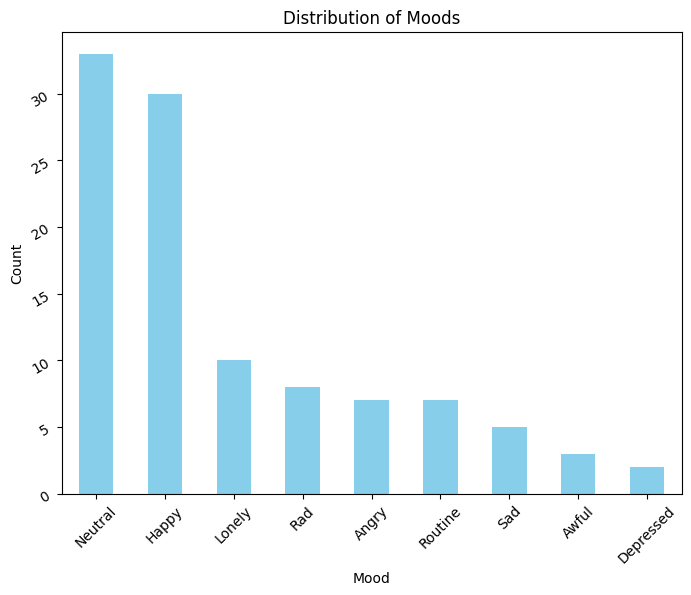

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each mood
mood_counts = df['Mood'].value_counts()

# Plot the distribution of moods
plt.figure(figsize=(8, 6))
mood_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=30)
plt.show()

Activity Distribution

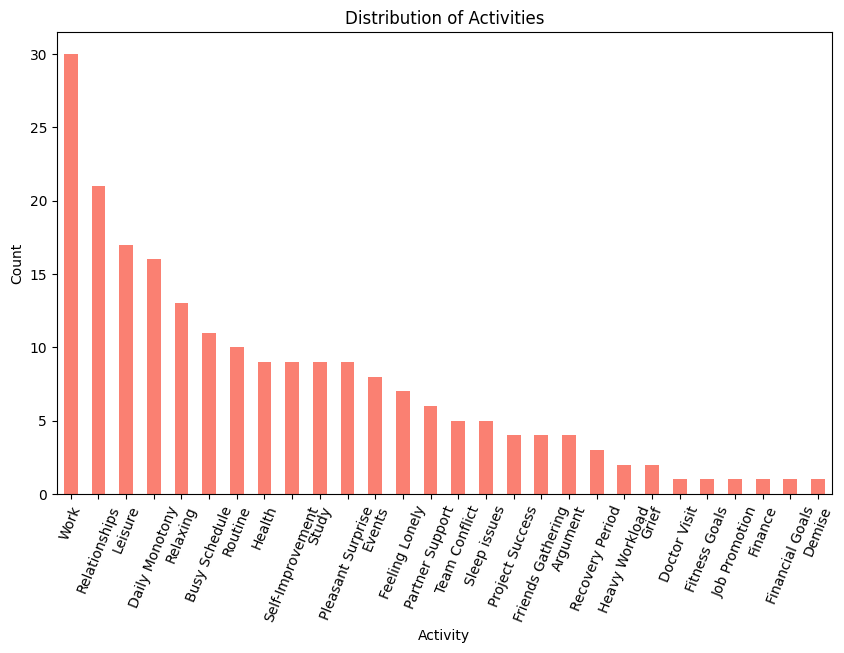

In [14]:
# Count the occurrences of each activity
activity_counts = df[['Activity-1', 'Activity-2']].stack().value_counts()

# Plot the distribution of activities
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=68)
plt.show()

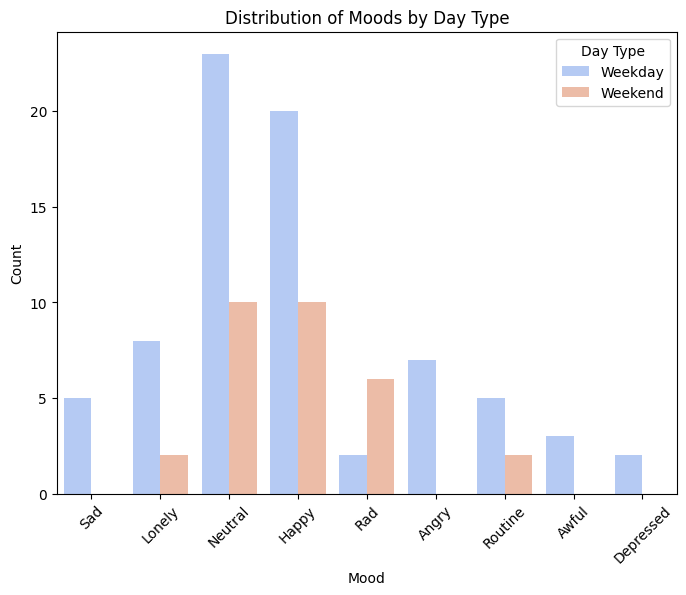

In [15]:
import seaborn as sns
df['Day_Type'] = df['Day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Plot the distribution of moods by day type
plt.figure(figsize=(8, 6))
sns.countplot(x='Mood', hue='Day_Type', data=df, palette='coolwarm')
plt.title('Distribution of Moods by Day Type')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.show()

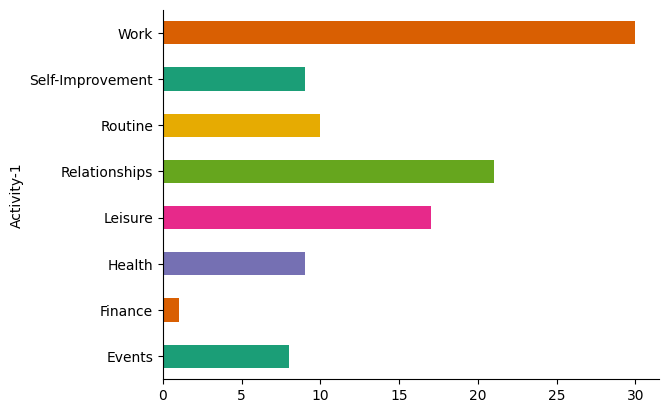

In [16]:
# @title Activity-1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Activity-1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

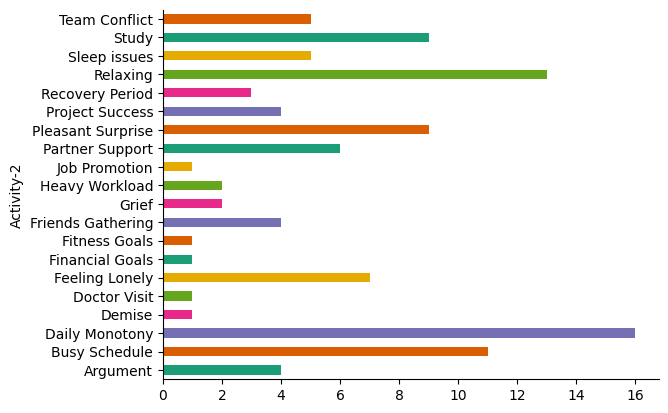

In [17]:
# @title Activity-2
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Activity-2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

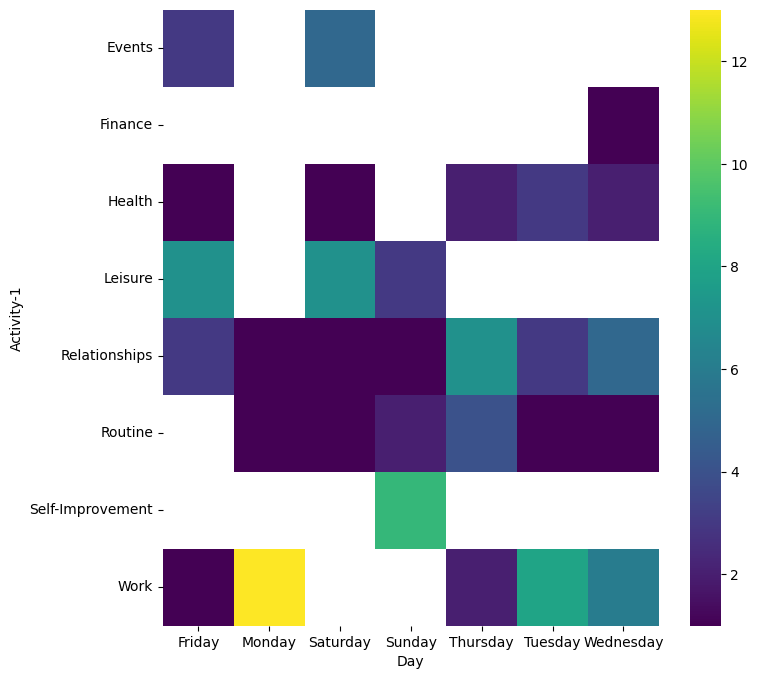

In [18]:
# @title Day vs Activity-1

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Activity-1'].value_counts()
    for x_label, grp in df.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('Activity-1')

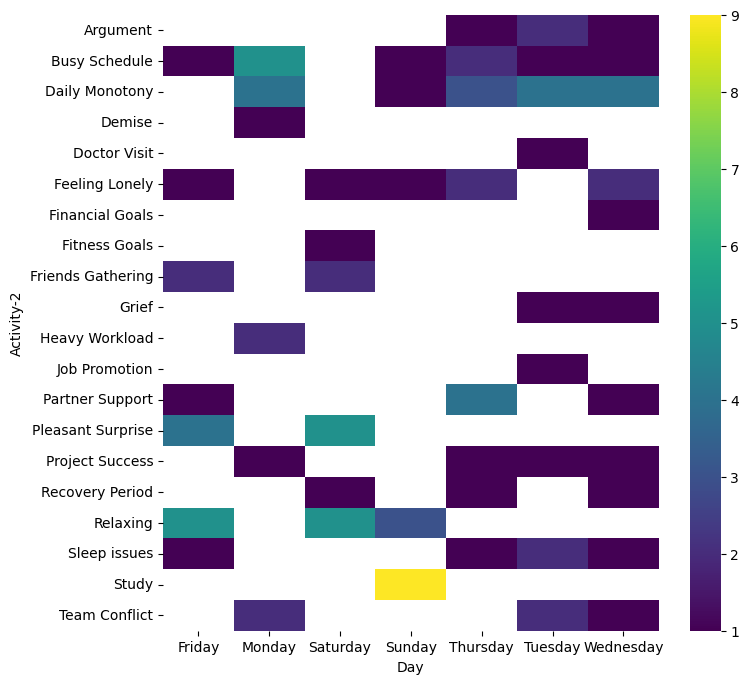

In [19]:
# @title Day vs Activity-2

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Activity-2'].value_counts()
    for x_label, grp in df.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('Activity-2')

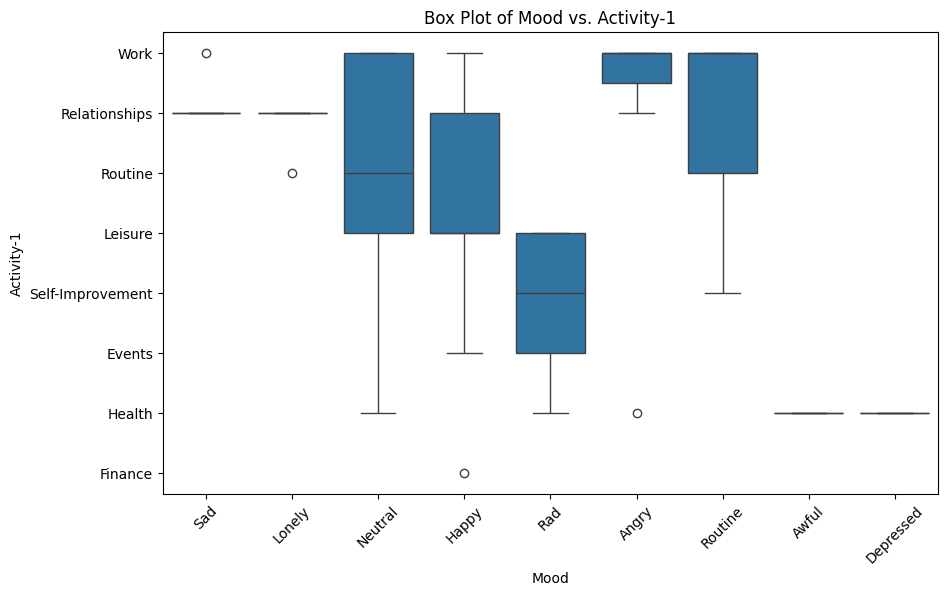

In [20]:
# Create box plots for numerical variables grouped by categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mood', y='Activity-1', data=df)
plt.title('Box Plot of Mood vs. Activity-1')
plt.xlabel('Mood')
plt.ylabel('Activity-1')
plt.xticks(rotation=45)
plt.show()

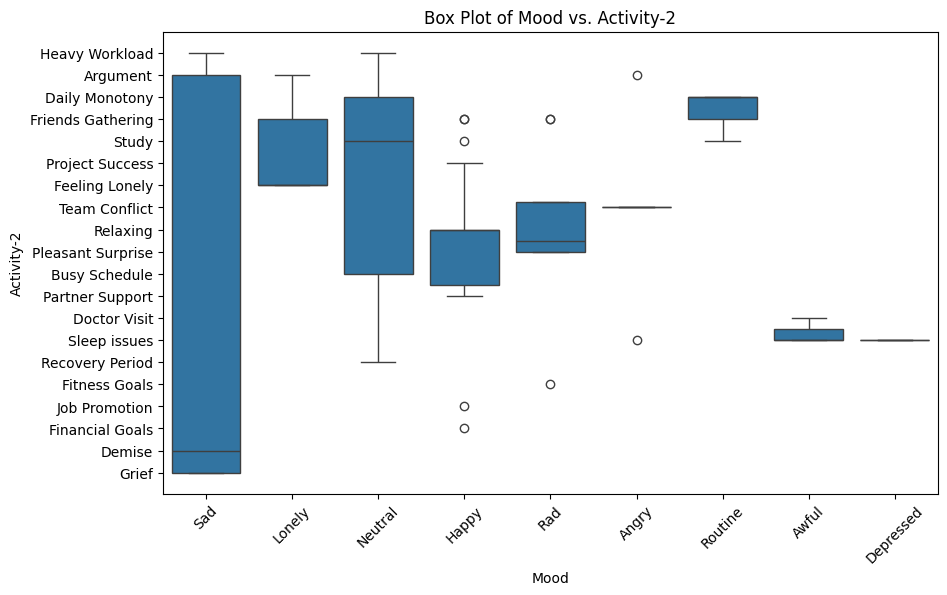

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mood', y='Activity-2', data=df)
plt.title('Box Plot of Mood vs. Activity-2')
plt.xlabel('Mood')
plt.ylabel('Activity-2')
plt.xticks(rotation=45)
plt.show()

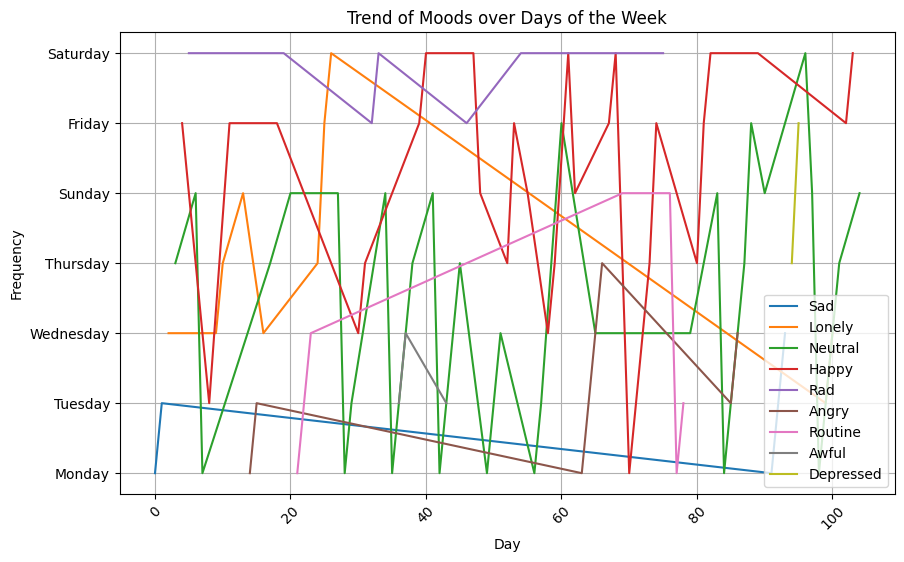

In [22]:
# Plot the trend of moods over the days of the week
plt.figure(figsize=(10, 6))
for mood in df['Mood'].unique():
    plt.plot(df[df['Mood'] == mood]['Day'], label=mood)
plt.title('Trend of Moods over Days of the Week')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

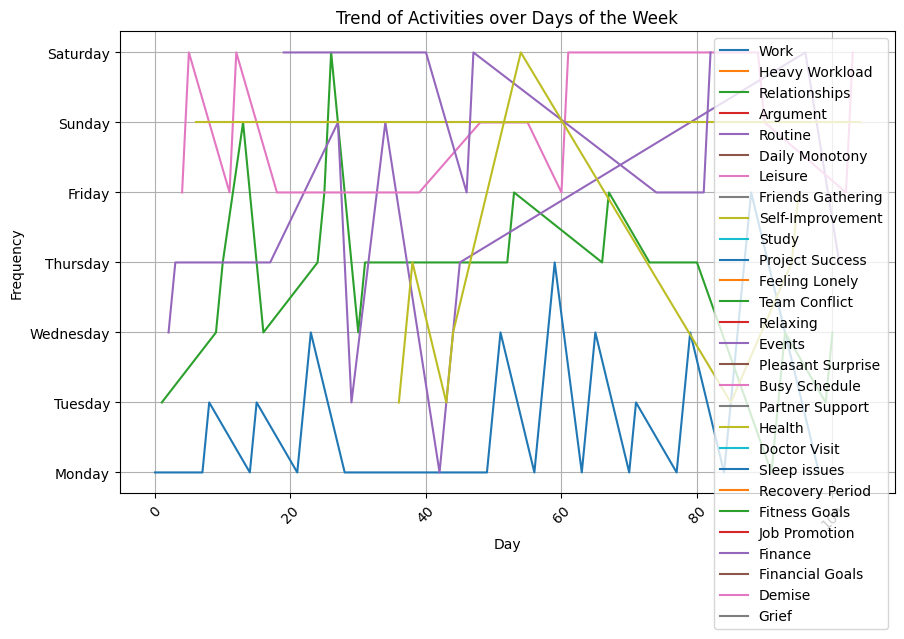

In [23]:
plt.figure(figsize=(10, 6))
for activity in df[['Activity-1', 'Activity-2']].stack().unique():
    plt.plot(df[df['Activity-1'] == activity]['Day'], label=activity)
plt.title('Trend of Activities over Days of the Week')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()